<a href="https://colab.research.google.com/github/thiagonoobre/Projeto_Analise_de_Vendas/blob/main/Explora%C3%A7%C3%A3o_An%C3%A1lise_de_Dados_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJETO EXPLORAÇÃO E ANÁLISE DE DADOS DE VENDAS

Nesse projeto estaremos trabalhando com conjunto de dados da ***Contoso Corporation***, que é uma empresa fictícia da **Microsoft**, no qual eles disponibilizaram um Banco de dados, que simula uma multinacional no setor de varejo ([link](https://www.microsoft.com/en-us/download/details.aspx?id=18279)). Seu banco de dados contém informações relacionadas a vendas, produtos, clientes e transações financeiras, oferecendo um cenário realista para explorar técnicas de análise de dados e gerar insights de negócios.

Neste notebook, realizaremos uma análise exploratória das vendas da Contoso, utilizando SQL para consultar e combinar tabelas, a fim de extrair informações valiosas e compreender melhor os padrões de vendas e o comportamento dos clientes.



![](https://learn.microsoft.com/pt-br/microsoft-365/media/contoso-overview/contoso-overview-fig1.png?view=o365-worldwide)

### 1\. Entendendos os Dados

Nosso foco será nas tabelas de vendas (`FactOnlineSales`), produtos (`DimProduct`) e clientes (`DimCustomer`). Através da análise desses dados e de suas relações com outras tabelas, buscaremos um entendimento mais completo do nosso banco de dados.

A análise não abrangerá todas as colunas das tabelas, no entanto, essa amostra nos permite ter uma ideia da dimensão do banco de dados e da complexidade dos dados que ele contém.

Apresentaremos as consultas (`queries`) utilizadas para extrair os nomes das colunas.

#### **1\.1 FactOnlineSales**

* Query para extrair os nomes das colunas


```sql
SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'FactOnlineSales'



Os dados replesentam as informações de vendas contendo as seguintes colunas:

* OnlineSalesKey = Id das vendas
* DateKey = Data da venda
* StoreKey = Id da Loja
* ProductKey = Id do Produto
* PromotionKey = Id da Promoção
* CurrencyKey = Id da Moeda
* CustomerKey = Id do Cliente
* SalesOrderNumber = Número do pedido de venda
* SalesOrderLineNumber = Número da linha do pedido de vendas
* SalesQuantity = Quantidade de vendas
* SalesAmount = Valor das vendas
* ReturnQuantity = Quantidade de devolução
* ReturnAmount = Valor da devolução
* DiscountQuantity = Quantidade do desconto
* DiscountAmount = Valor do desconto
* TotalCost = Custo total
* UnitCost = Custo unitário
* UnitPrice = Preço unitário

#### **1\.2 DimProduct**

* Query para extrair os nomes das colunas



```sql
SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'DimProduct'



Os dados replesentam as informações dos produtos contendo as seguintes colunas:

* ProductKey = Id do Produto
* ProductLabel = Rótulo do produto
* ProductName = Nome do produto
* ProductDescription = Descrição do produto
* ProductSubcategoryKey = Is da subcategoria do produto
* Manufacturer = Fabricante
* BrandName = Nome da marca
* ClassID = ClassID
* ClassName = Nome da classe
* StyleID = ID do estilo
* StyleName = Nome do estilo
* ColorID = ID da cor
* ColorName = Nome da cor
* Size = Tamanho
* SizeRange = Faixa de tamanho
* SizeUnitMeasureID = ID da unidade de medida de tamanho
* Weight = Peso
* WeightUnitMeasureID = ID da unidade de medida de peso
* UnitOfMeasureID = ID da unidade de medida
* UnitOfMeasureName = Nome da unidade de medida
* StockTypeID = ID do tipo de estoque
* StockTypeName = Nome do tipo de estoque
* UnitCost = Custo unitário
* UnitPrice = Preço unitário
* AvailableForSaleDate = Data de disponibilidade para venda
* StopSaleDate = Data de término da venda
* Status = Status

#### **1\.2 DimCustomer**

* Query para extrair os nomes das colunas



```sql
SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'DimCustomer'



Os dados replesentam as informações dos Clientes contendo as seguintes colunas:

* CustomerKey = Id do Cliente
* GeographyKey = Id da Geografia
* CustomerLabel = Rótulo do Cliente
* Title = Título
* FirstName = Primeiro Nome
* MiddleName = Nome do Meio
* LastName = Sobrenome
* NameStyle = Estilo do Nome
* BirthDate = Data de Nascimento
* MaritalStatus = Estado Civil
* Suffix = Sufixo
* Gender = Gênero
* EmailAddress = Endereço de Email
* YearlyIncome = Renda Anual
* TotalChildren = Total de Filhos
* NumberChildrenAtHome = Número de Filhos em Casa
* Education = Educação
* Occupation = Ocupação
* HouseOwnerFlag = Indicador de Proprietário de Casa
* NumberCarsOwned = Número de Carros Possuídos
* AddressLine1 = Endereço Linha 1
* AddressLine2 = Endereço Linha 2
* Phone = Telefone
* DateFirstPurchase = Data da Primeira Compra
* CustomerType = Tipo de Cliente
* CompanyName = Nome da Empresa

### 2\. Exploração de Dados

#### **2\.1 Coleta**

Para iniciar a análise dos dados, realizei uma consulta SELECT TOP(5) em cada uma das tabelas principais: `DimProduct`, `DimCustomer` e `FactOnlineSales`. Essa consulta me permitiu obter uma amostra dos 5 primeiros registros de cada tabela, o que me deu uma visão geral rápida da estrutura e dos dados contidos em cada uma delas. Essa abordagem é útil para validar a integridade dos dados e identificar possíveis inconsistências antes de realizar análises mais aprofundadas.

- FactOnlineSales

```sql
SELECT TOP(5) * FROM FactOnlineSales
 ```

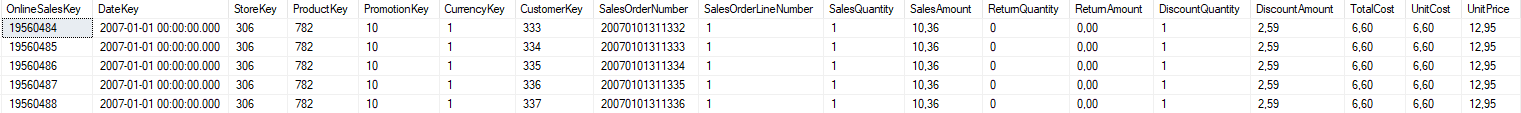

- DimCustomer

```sql
SELECT TOP(5) * FROM DimCustomer
 ```

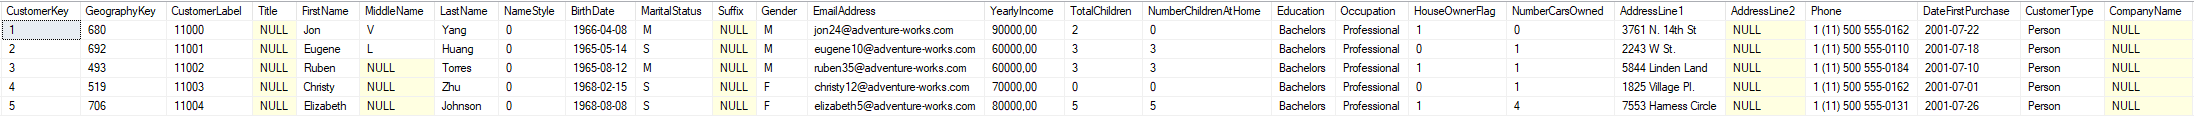

- DimProduct

```sql
SELECT TOP(5) * FROM DimProduct
```

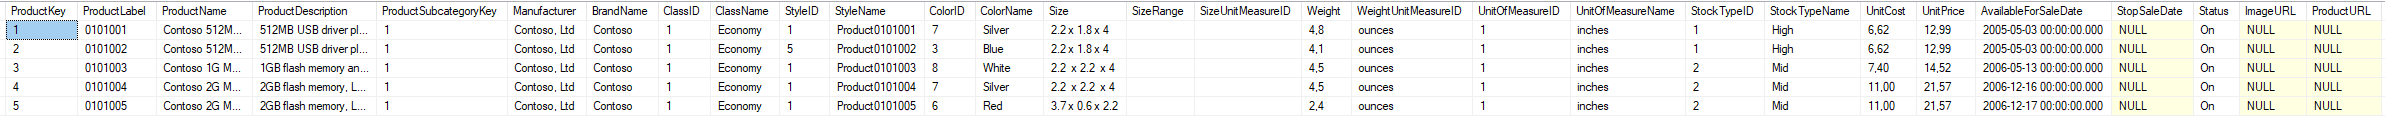

>As queries a seguir dara uma visão da quantidade de registros que temos em cada tabela.

- FactOnlineSales

```sql
SELECT COUNT(*) FROM FactOnlineSales
 ```

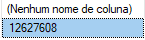

- DimCustomer

```sql
SELECT COUNT(*) FROM DimCustomer
 ```

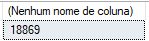

- DimProduct

```sql
SELECT COUNT(*) FROM DimProduct
```

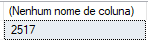

>Como podemos ver temos grande quantidade de registro de vendas. O próximo passo é investigar a qualidade dos dados nas suas tabelas `DimProduct`, `DimCustomer` e `FactOnlineSales`. Para isso, utilizaremos consultas SQL específicas para identificar dados nulos e verificar os tipos de dados em cada coluna. Considerando que você já possui familiaridade com essas tabelas, apresentarei a seguir as consultas e seus objetivos.


#### **2\.2 Estrutura**

```sql
SELECT
    COLUMN_NAME AS ColumnName,
    DATA_TYPE AS DataType,
    IS_NULLABLE AS IsNullable
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'TableName';


- FactOnlineSales

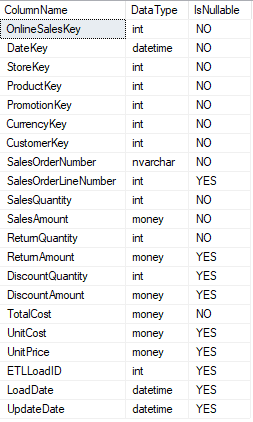

- DimCustomer

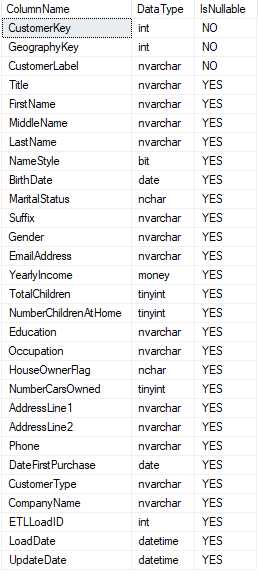

- DimProduct

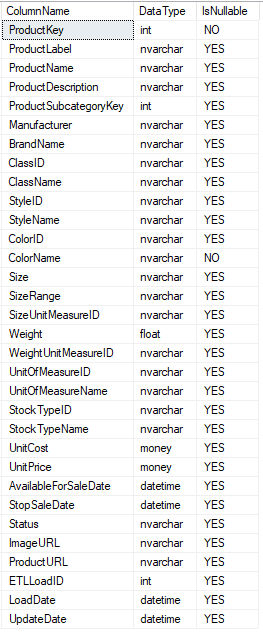


**Explicação dos Campos**

1. **`COLUMN_NAME`**: Nome da coluna na tabela.
2. **`DATA_TYPE`**: Tipo de dado da coluna (ex.: `int`, `varchar`, etc.).
3. **`IS_NULLABLE`**: Indica se a coluna permite valores nulos (`YES` ou `NO`).
4. **`NullCount`**: Conta a quantidade de valores nulos em cada coluna da tabela especificada.




Mesmo que uma coluna esteja configurada como **`IS_NULLABLE = YES`**, permitindo valores nulos, isso não significa que ela necessariamente tenha valores nulos armazenados. A configuração indica apenas que o banco de dados aceita entradas nulas para aquela coluna, mas o conteúdo real da tabela depende dos dados inseridos. Por isso, é importante verificar diretamente o número de valores nulos para ter uma visão clara da integridade dos dados.

#### **2\.3 Dados Faltantes**

Para garantir a qualidade dos dados em nossas análises, vamos iniciar a verificação de valores nulos nas colunas do tipo `varchar` (texto). Concentraremos nossos esforços nas colunas que serão utilizadas como critério de filtragem, agrupamento ou cálculo nas próximas etapas, a fim de evitar resultados imprecisos.

- FactOnlineSales

>A tabela `FactOnlineSales`  possui restrições de integridade em algumas colunas, garantindo a presença de dados nesses campos.


- DimCustomer

```sql
SELECT COUNT(*) FROM DimCustomer WHERE FirstName IS NULL


>Resultado: 385
>
>A coluna de `FirstName` pode-se encontrar o primeiro nome do cliente, mas encontramos 385 valores nulos. Não só nela, mas se fizer uma consulta mais aprofunda, pode ser enccontrado os mesmo resultados para as colunas de `LastName`, `BirthDate`, `Gender` e `EmailAddress`, no qual são informações essenciais para as nossas consultas.




```sql
SELECT * FROM DimCustomer WHERE FirstName IS NULL


>Ao analisar os valores nulos nas colunas `LastName`, `BirthDate`, `Gender` e `EmailAddress`, observamos que a maioria está concentrada em registros onde o `CustomerType` é 'Company'. Essa situação é esperada, pois a Contoso atende tanto empresas quanto pessoas físicas. Essa informação é fundamental para nossas próximas análises.

```sql
SELECT * FROM DimCustomer WHERE CustomerType = 'Person'



>Ao filtrar os dados para clientes do tipo 'Person', constatamos que a coluna `CompanyName` não possui valor para esses registros.

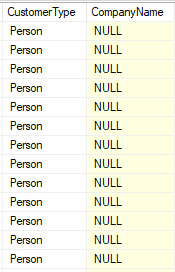

>A Contoso possui uma base de clientes diversificada, incluindo tanto pessoas físicas quanto empresas. Isso nos permite realizar análises abrangentes sobre os diferentes perfis de consumidores.

---

- DimProduct

```sql
SELECT COUNT(DISTINCT ProductName) FROM DimProduct


>Resultado: 2517
>
>A quantidade de produtos registrados corresponde ao número de nomes de produtos únicos encontrados na base de dados. É fundamental que não haja valores nulos no campo 'Nome do Produto', pois essa informação é essencial para identificar cada item de forma individual.

---





```sql
SELECT DISTINCT BrandName FROM DimProduct


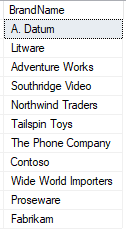





>Neste ponto, já é possível identificar as marcas presentes no catálogo de produtos comercializados pela Contoso, sem a presença de valores nulos.

---

### 3\. Análise de dados


Após a exploração inicial dos dados, passamos à etapa de análise para extrair insights acionáveis que auxiliem na tomada de decisão. Nesta etapa, focaremos em três pilares:
- Comportamento dos clientes
- Performance dos produtos
- Tendências e padrões de vendas

Essas análises serão realizadas com base nas tabelas de Clientes, Vendas Online e Produtos.



#### **3\.1 Análise do Comportamento dos Clientes**

**Pergunta:** Quais são os clientes mais valiosos e qual o ticket médio por compra?

***Passo 1: Extração dos Dados***

Utilizamos as tabelas de `DimCustomer` e `FactOnlineSales` para calcular:
- Total gasto por cliente
- Frequência de compras
- Ticket médio

***Passo 2: Visualização***

[Insira o gráfico aqui, como um bar chart mostrando os clientes mais valiosos.]

***Passo 3: Interpretação***

Os dados mostram que os clientes do grupo X possuem maior frequência de compras, com um ticket médio de Y. Esse grupo pode ser prioritário em campanhas de marketing.


- De primeiro momento vamos entender as vendas registradas de quais anos

```sql
SELECT
	DISTINCT
	YEAR(DateKey) AS 'YEAR'
FROM
	FactOnlineSales


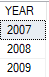

> Ao analisarmos os resultados desta consulta, conseguimos determinar os anos exatos que estão incluídos em nossa base de dados de vendas. Essa informação é essencial para calcular a frequência de compra dos clientes, ou seja, quantas vezes cada cliente realizou uma compra em um determinado período.

---

Para realizar o cálculo, utilizamos as tabelas `DimCustomer` e `FactOnlineSales`. No entanto, é necessário filtrar os dados por tipo de cliente (pessoa física ou jurídica). Essa filtragem é crucial, pois empresas tendem a realizar compras de maior valor, o que pode distorcer nossa análise, gerando **outliers** indesejados:

- Total gasto por cliente
- Frequência de compras
- Ticket médio

```sql

SELECT
	f.CustomerKey,
	SUM(SalesAmount) AS 'RECEITA_TOTAL',
	COUNT(OnlineSalesKey) AS 'FREQUÊNCIA_COMPRA',
	SUM(SalesAmount) / COUNT(OnlineSalesKey) AS 'TICKET_MEDIO'
FROM
	FactOnlineSales AS f
INNER JOIN DimCustomer AS c
	ON f.CustomerKey = c.CustomerKey
WHERE CustomerType = 'Person'
GROUP BY f.CustomerKey
ORDER BY RECEITA_TOTAL


>O próximo passo envolve a importação dos dados extraídos do ***SQL Server*** para a linguagem Python, utilizando a biblioteca ***Pandas***. Clonaremos um repositório do GitHub onde os dados já estão armazenados. Em seguida, realizaremos uma análise da qualidade dos dados para garantir a confiabilidade das próximas etapas da análise.

##### ***3\.1\.1 Clonando o Repositório***

Nesse momento teremos que trazer a base de dados para o colab para que possamos tratar e trabalhar esses dados nos seguintes passos:
- Clonar a base de dados `resultado_query_freq_ticket_receita.csv`,dentro do repositório do git hub
- Acessar a pasta onde está a bade de dados
- Baixar a base de dados compilada
- Verificar e acessar a base de dados

In [1]:
# Clone o repositório
# Se você tiver usando o colab você verificar que em ARQUIVOS o clone do repositório
!git clone https://github.com/thiagonoobre/Projeto_Analise_de_Vendas.git


Cloning into 'Projeto_Analise_de_Vendas'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 7), reused 9 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 526.04 KiB | 3.73 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
# Acesse a pasta com o código
%cd /content/Projeto_Analise_de_Vendas/arquivos_csv
!ls  # verifica os arquivos do projeto

/content/Projeto_Analise_de_Vendas/arquivos_csv
resultado_query_freq_ticket_receita.csv
resultado_query_yearlyincome_education_Occupation_numbercars.csv


##### ***3\.1\.2 Coleta***

Iniciaremos a análise exploratória acessando os dados do repositório

###### *3\.1\.2\.1 imports*

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler

In [4]:
# Para ajudar a achar o caminho do arquivo
# você pode selecionar o arquivo desejado clicar com botão direito
# e copiar o caminho

df = pd.read_csv('/content/Projeto_Analise_de_Vendas/arquivos_csv/resultado_query_freq_ticket_receita.csv', sep=';')


In [5]:
df.head()

,18365,"14082,8619",140,"100,5918"
0,17466,"14950,5401",142,"105,2854"
1,17547,"15338,1488",142,"108,0151"
2,11436,"15357,3821",141,"108,9176"
3,13695,"15567,4579",139,"111,9961"
4,9044,"15569,8372",147,"105,9172"


##### ***3\.1\.3 Wrangling***

 Ao analisar a base de dados importada, notamos a ausência de uma linha de cabeçalho, o que indica que os nomes das colunas não estão explicitamente definidos. No entanto, de acordo com a consulta SQL realizada, sabemos que as colunas estão ordenadas da seguinte forma:

- `Id cliente`
- `receita total`
- `Frequência de Compra`
- `Ticket Médio`

In [6]:
# Inserindo o cabeçalho nas colunas
# Nome das colunas
columns = ['IdCliente', 'ReceitaTotal', 'FrequenciaCompra', 'TicketMedio']

# header=None, faz com que o pandas entenda que os dados não tem Cabeçalho
revenue_df = pd.read_csv('/content/Projeto_Analise_de_Vendas/arquivos_csv/resultado_query_freq_ticket_receita.csv', sep=';', header=None)

# renomeia as colunas
revenue_df.columns = columns

In [7]:
# não perdemos os dados que estavam no cabeçalho
revenue_df.head()


,IdCliente,ReceitaTotal,FrequenciaCompra,TicketMedio
0,18365,"14082,8619",140,"100,5918"
1,17466,"14950,5401",142,"105,2854"
2,17547,"15338,1488",142,"108,0151"
3,11436,"15357,3821",141,"108,9176"
4,13695,"15567,4579",139,"111,9961"


##### ***3\.1\.4 Estrutura***

In [8]:
# Quantidade de linhas e colunas
revenue_df.shape

(18484, 4)

In [9]:
# Consistencia dos dados
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IdCliente         18484 non-null  int64 
 1   ReceitaTotal      18484 non-null  object
 2   FrequenciaCompra  18484 non-null  int64 
 3   TicketMedio       18484 non-null  object
dtypes: int64(2), object(2)
memory usage: 577.8+ KB


Analisando a coluna `ReceitaTotal` e  `TicketMedio`, pode-se verificar que o tipo de dado é *Object*. Será nescessario tranformar esses dados em *Float*. Outra questão é que para transformação para decimal será preciso troca a virgula por ponto.

In [10]:
# Coluna ReceitaTotal
revenue_df.ReceitaTotal = revenue_df.ReceitaTotal.str.replace(',', '.').astype(float).round(2)

# Coluna TicketMedio
revenue_df.TicketMedio = revenue_df.TicketMedio.str.replace(',', '.').astype(float).round(2)


In [11]:
# Verificando o tipo de dado
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IdCliente         18484 non-null  int64  
 1   ReceitaTotal      18484 non-null  float64
 2   FrequenciaCompra  18484 non-null  int64  
 3   TicketMedio       18484 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 577.8 KB


In [12]:
revenue_df.head()

,IdCliente,ReceitaTotal,FrequenciaCompra,TicketMedio
0,18365,14082.86,140,100.59
1,17466,14950.54,142,105.29
2,17547,15338.15,142,108.02
3,11436,15357.38,141,108.92
4,13695,15567.46,139,112.00


##### ***3\.1\.5 Análise***

In [13]:
revenue_df.drop('IdCliente', axis=1).describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
ReceitaTotal,18484.0,37099.852967,12827.674357,14082.86,29513.5975,33292.11,38475.9925,85363.95
FrequenciaCompra,18484.0,153.224032,59.989425,69.00,105.0000,123.00,196.0000,379.00
TicketMedio,18484.0,260.474471,76.778412,100.59,165.4875,294.45,320.7300,432.14


- Vamos indentificar se a nossa base de dados possui *outliers*, ja que eles serão importante para a tomada de decisão e insight.

<ipython-input-14-8ba7d288a8bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=revenue_df['ReceitaTotal'], orient='v', palette= 'Set2')


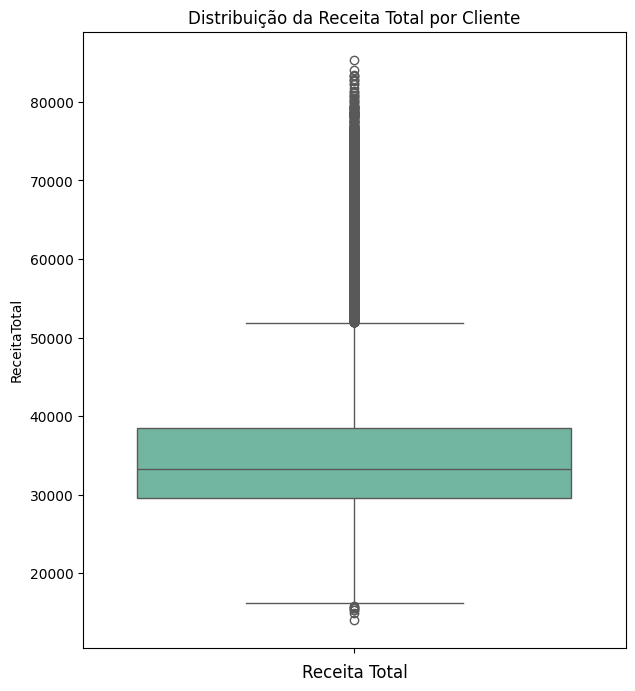

In [14]:
# Criar o Boxplot da Receita total
plt.figure(figsize=(7, 8))
sns.boxplot(data=revenue_df['ReceitaTotal'], orient='v', palette= 'Set2')
plt.title('Distribuição da Receita Total por Cliente', fontsize=12)
plt.xlabel('Receita Total', fontsize=12)
plt.show()

<ipython-input-15-dd6319915d85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=revenue_df['FrequenciaCompra'], orient='v', palette= 'Set2')


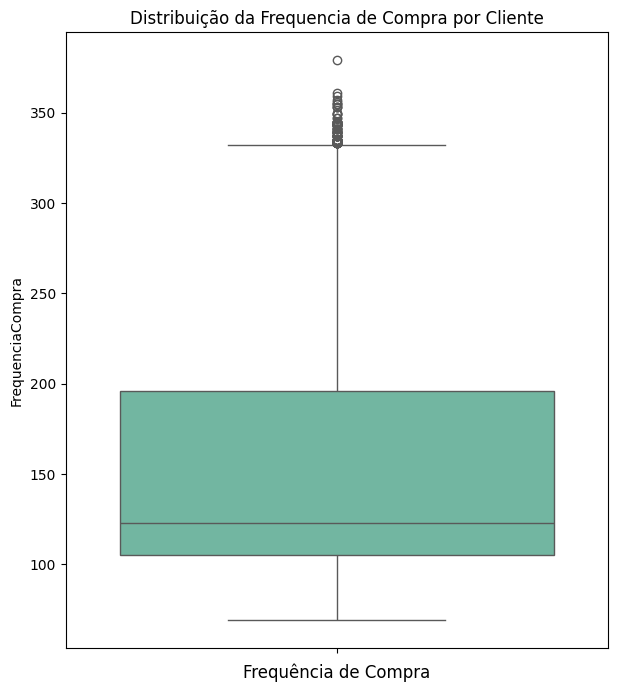

In [15]:
# Criar o Boxplot da Frequencia de Compra
plt.figure(figsize=(7, 8))
sns.boxplot(data=revenue_df['FrequenciaCompra'], orient='v', palette= 'Set2')
plt.title('Distribuição da Frequencia de Compra por Cliente', fontsize=12)
plt.xlabel('Frequência de Compra', fontsize=12)
plt.show()

>A análise do *boxplot* revela a presença de um número significativo de *outliers* na receita total, indicando a existência de um grupo de clientes com gastos consideravelmente superiores aos demais. **Esses clientes, que também apresentam alta frequência de compra, merecem atenção especial, pois podem ser alvo de ofertas personalizadas e ações de fidelização.**
>
>**Uma análise adicional não identificou *outliers* inferiores nas frequência de compra, sugerindo que todos os cliente independente do valor gato, compra com regularidade.**

In [16]:
#calcular a correção
correlacao = revenue_df['FrequenciaCompra'].corr(revenue_df['ReceitaTotal'])
print(f'A correlação entre Receita Total e Frequência de Compra é de: {correlacao:.2f}')

A correlação entre Receita Total e Frequência de Compra é de: 0.56


<ipython-input-17-b99dae442984>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=revenue_df, x='FrequenciaCompra', y='ReceitaTotal', palette= 'Set2')


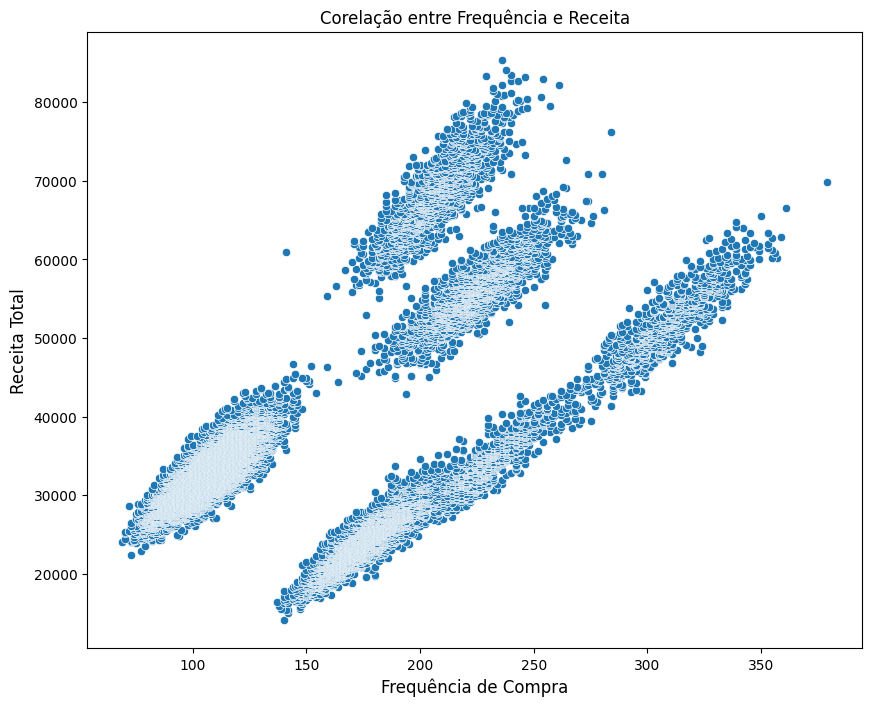

In [17]:
# Criar o scatterplot para corelacionar frequência de compra e receita total
plt.figure(figsize=(10, 8))
sns.scatterplot(data=revenue_df, x='FrequenciaCompra', y='ReceitaTotal', palette= 'Set2')
plt.title('Corelação entre Frequência e Receita', fontsize=12)
plt.xlabel('Frequência de Compra', fontsize=12)
plt.ylabel('Receita Total', fontsize=12)

plt.show()


>Ao observar o gráfico de scatterplot, pode-se verificar que temos uma correlação entre frequência de compra e receita total positiva. **Além disso, essa exploração indicou a existência de 4 agrupamentos distintos, o que pode ser explicado por diferente fatores, como categoria de produtos, segmentos de cliente, promoções ou plano de fidelidade.**Já que o nosso intuito neste momento é segmentar os clientes e identificar os principais grupos, a análise das causas dessa correlação ficará para um estudo futuro.

---



A próxima etapa ocorrerá a analise dos *outliers* de clientes ***que compra com alta frequência e com receita alta***, trazendo suas características como clientes e compras para trazer melhores ofertas.

Em seguida será aprofundar a análise dos cliente com ***baixa receita total***, buscando identificar suas características e entender os motivos que levam a gastar menos. Essa análise revelara oportunidade de melhoria em nossa estratégia de produtos.


- Vamos está analisando os cliente mais engajados com a nossa marca e os menos engajados, para isso vamos está ultilizando metodos estatiticos para encontrar os *outliers* superiores e inferiores.

In [18]:
# Calcular os limites com base na Receita total
Q1_receita = revenue_df['ReceitaTotal'].quantile(0.25)
Q3_receita = revenue_df['ReceitaTotal'].quantile(0.75)
IQR_receita = Q3_receita - Q1_receita

# Calcular os limites com base na Frequência de Compra
Q1_freq = revenue_df['FrequenciaCompra'].quantile(0.25)
Q3_freq = revenue_df['FrequenciaCompra'].quantile(0.75)
IQR_freq = Q3_freq - Q1_freq

# Limites
Limite_inferior_receita = Q1_receita - 1.5 * IQR_receita
Limite_superior_receita = Q3_receita + 1.5 * IQR_receita

Limite_inferior_freq = Q1_freq - 1.5 * IQR_freq
Limite_superior_freq = Q3_freq + 1.5 * IQR_freq

# Filtrar clientes pelos outliers
outliers_superior_receita = revenue_df[revenue_df['ReceitaTotal'] > Limite_superior_receita]
outliers_inferior_receita = revenue_df[revenue_df['ReceitaTotal'] < Limite_inferior_receita]

outliers_superior_freq = revenue_df[revenue_df['FrequenciaCompra'] > Limite_superior_freq ]
outliers_inferior_freq  = revenue_df[revenue_df['FrequenciaCompra'] < Limite_inferior_freq ]


In [19]:
# Entendento a quantidade de cliente
print(f'Outliers superiores da receita: {outliers_superior_receita.shape[0]}')
print(f'Outliers inferiores da receita: {outliers_inferior_receita.shape[0]}')

print(f'Outliers superiores da frequencia de compra: {outliers_superior_freq.shape[0]}')
print(f'Outliers inferiores da frequencia de compra: {outliers_inferior_freq.shape[0]}')

Outliers superiores da receita: 3177
Outliers inferiores da receita: 8
Outliers superiores da frequencia de compra: 91
Outliers inferiores da frequencia de compra: 0


In [61]:
# Mesclar os clientes dos limites superiores de receita e frequência de compra
clientes_valiosos = pd.concat([outliers_superior_receita, outliers_superior_freq]).drop_duplicates(subset='IdCliente')


In [62]:
clientes_valiosos.sort_values('IdCliente').head(10)


,IdCliente,ReceitaTotal,FrequenciaCompra,TicketMedio
17042,1,60931.88,141,432.14
15587,80,53408.48,208,256.77
15999,81,55283.90,222,249.03
18221,82,72734.62,206,353.08
18321,83,74747.68,210,355.94
18438,84,78528.58,230,341.43
15315,141,51953.02,304,170.90
18408,174,76849.64,229,335.59
18414,175,77345.41,216,358.08
18450,178,79053.66,222,356.10


> Pelo resultado obtido, podemos analisar que os cliente que estão nos outliers superiores frequência de compra estão contidos dentro dos outliers superiores da receita, ja que a quantidade de linhas dentro do `dataframe` acima permaneceu em **3177**.

- Vamos separar os clientes da base de dados para retirar os insights demograficos deles

In [34]:
id_clientes_valiosos = clientes_valiosos['IdCliente'].tolist()

###### *3\.1\.5\.1 Análise de Cluster*

Com base nos dados da tabela `DimCustomer`, poderemos criar clusters significativos usando variáveis que impactam diretamente o comportamento de compra.

Selecionaremos variáveis relevantes para o Cluster, que ajudem a escolher a diferenciar os cliente:

- YearlyIncome
- Education
- Occupation
- NumberCarsOwned


```sql
SELECT
	CustomerKey,
	YearlyIncome,
	Education,
	Occupation,
	NumberCarsOwned
FROM
	DimCustomer
WHERE CustomerType = 'Person'


In [26]:
# base de dados de demografia dos clientes
columns = ['CustomerKey', 'YearlyIncome', 'Education', 'Occupation', 'NumberCarsOwned']

demography_df = pd.read_csv('/content/Projeto_Analise_de_Vendas/arquivos_csv/resultado_query_yearlyincome_education_Occupation_numbercars.csv', sep=';', header=None)

# renomeia as colunas
demography_df.columns = columns

In [27]:
demography_df.head()

,CustomerKey,YearlyIncome,Education,Occupation,NumberCarsOwned
0,1,"90000,00",Bachelors,Professional,0
1,2,"60000,00",Bachelors,Professional,1
2,3,"60000,00",Bachelors,Professional,1
3,4,"70000,00",Bachelors,Professional,1
4,5,"80000,00",Bachelors,Professional,4


In [28]:
# quantidade de cliente
demography_df.shape

(18484, 5)

In [29]:
# qualidade dos dados
demography_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerKey      18484 non-null  int64 
 1   YearlyIncome     18484 non-null  object
 2   Education        18484 non-null  object
 3   Occupation       18484 non-null  object
 4   NumberCarsOwned  18484 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 722.2+ KB


- Será filtrado o dataframe `demography_df`, com o dataframe `clientes_valiosos`. Onde será selecionados apendas clientes com a demografia especifica dos clientes valiosos.

In [39]:
demography_df = demography_df[demography_df['CustomerKey'].isin(id_clientes_valiosos)]

In [40]:
demography_df.shape[0]

3177

In [41]:
# qualidade dos dados
demography_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3177 entries, 0 to 18433
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerKey      3177 non-null   int64 
 1   YearlyIncome     3177 non-null   object
 2   Education        3177 non-null   object
 3   Occupation       3177 non-null   object
 4   NumberCarsOwned  3177 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 148.9+ KB


 - Vamos começar o tratamento para essa base de dados

In [42]:
# YearlyIncome está como object, mas é float
demography_df.YearlyIncome = demography_df.YearlyIncome.str.replace(',', '.').astype(float).round(2)

In [44]:
demography_df.head(3)

,CustomerKey,YearlyIncome,Education,Occupation,NumberCarsOwned
0,1,90000.0,Bachelors,Professional,0
79,80,160000.0,Graduate Degree,Management,2
80,81,170000.0,Graduate Degree,Management,2


In [43]:
# qualidade dos dados
demography_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3177 entries, 0 to 18433
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerKey      3177 non-null   int64  
 1   YearlyIncome     3177 non-null   float64
 2   Education        3177 non-null   object 
 3   Occupation       3177 non-null   object 
 4   NumberCarsOwned  3177 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 148.9+ KB


- Tratando as variáveis categóricas nominais e ordinais

In [50]:
# categorico ordinal
educations = demography_df['Education'].unique()
print(educations)

['Bachelors' 'Graduate Degree' 'Partial High School' 'Partial College'
 'High School']


In [52]:
# categorias
education_categories ={
    'Partial High School': 1,
    'High School': 2,
    'Partial College': 3,
    'Bachelors': 4,
    'Graduate Degree': 5,

}

In [53]:
# adcionado os dados
demography_df['Education'] = demography_df['Education'].apply(lambda level: education_categories[level])


In [54]:
# categorico nominal
occupations = demography_df['Occupation'].unique()
print(occupations)


['Professional' 'Management' 'Clerical' 'Skilled Manual' 'Manual']


In [55]:
# adcionando dados

for occupation in occupations:
  demography_df[f'occupation_{occupation}_nom'] = demography_df['Occupation'].apply(lambda x: 1 if x == occupation else 0)


In [60]:
demography_df.head(10)

,CustomerKey,YearlyIncome,Education,Occupation,NumberCarsOwned,occupation_Professional_nom,occupation_Management_nom,occupation_Clerical_nom,occupation_Skilled Manual_nom,occupation_Manual_nom
0,1,90000.0,4,Professional,0,1,0,0,0,0
79,80,160000.0,5,Management,2,0,1,0,0,0
80,81,170000.0,5,Management,2,0,1,0,0,0
81,82,120000.0,4,Management,3,0,1,0,0,0
82,83,130000.0,5,Management,3,0,1,0,0,0
83,84,130000.0,5,Management,3,0,1,0,0,0
140,141,30000.0,1,Clerical,2,0,0,1,0,0
173,174,110000.0,5,Management,4,0,1,0,0,0
174,175,110000.0,5,Management,0,0,1,0,0,0
177,178,110000.0,5,Management,2,0,1,0,0,0
